In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import matplotlib.patches as mpatches 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import joblib

In [2]:
df = pd.read_csv("wdbc.csv")
df

,Ob,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
cols0 = df.columns.values.tolist()
cols0 = cols0[2:32]
cols1 = ['perimeter_worst','perimeter_mean','area_worst','area_mean','concave.points_mean','concave.points_worst',
        'radius_worst','radius_mean','concavity_worst','concavity_mean']
cols2 = ["radius_mean","perimeter_mean","area_mean",'concave.points_mean','concavity_mean']
cols3 = ['perimeter_worst','perimeter_mean','area_worst','area_mean','concave.points_mean','concave.points_worst']
cols4 = ['perimeter_worst','perimeter_mean','area_worst','area_mean']
cols5 = ['area_worst','area_mean','concave.points_mean','concave.points_worst']
cols6 = ['area_mean','concave.points_mean']
cols =[cols0,cols1,cols2,cols3,cols4,cols5,cols6]

In [4]:
def clean_data(df1):
    encoder = preprocessing.LabelEncoder().fit(df1['diagnosis'])
    df1['diagnosis'] = encoder.transform(df1['diagnosis'])
    df1 = df1.dropna()
    X = df1.drop(['diagnosis'],axis = 1)
    y = df1['diagnosis']
    #standarization
    X_mean=X.mean(axis=0)
    X_std=X.std(axis=0)
    X= (X-X_mean)/X_std
    df2 = pd.concat([y,X],axis=1)
    return df2   

In [5]:
dataset = clean_data(df)
dataset

,diagnosis,Ob,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,1,-0.236197,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1,-0.236196,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1,0.431362,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,1,0.431741,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1,0.431821,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,-0.235524,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1,-0.235522,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,1,-0.235520,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1,-0.235518,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [6]:
train,test=train_test_split(dataset,test_size=.3,random_state=42)

X_train=train.drop(['diagnosis'],axis = 1)
y_train=train['diagnosis']

X_test=test.drop(['diagnosis'],axis = 1)
y_test=test['diagnosis']

In [7]:
X_train[cols5]

,area_worst,area_mean,concave.points_mean,concave.points_worst
149,-0.271680,-0.198597,-0.918210,-0.827846
124,-0.436428,-0.288108,-0.539114,-0.377687
421,-0.125375,0.003441,0.362882,-0.057905
195,-0.491753,-0.393531,-0.648126,-0.490721
545,-0.264831,-0.232128,-0.631117,-0.652133
...,...,...,...,...
71,-1.047117,-1.167583,-0.520558,-1.015424
106,-0.630331,-0.688773,-0.362580,0.109440
270,-0.344218,-0.063337,-1.099640,-1.236472
435,-0.019817,-0.157394,0.404889,1.035925


In [8]:
X_test[cols5]

,area_worst,area_mean,concave.points_mean,concave.points_worst
204,-0.355986,-0.491566,-0.275989,-0.199388
70,1.730754,1.350076,0.788366,0.978115
131,0.483733,0.267142,0.823415,0.559752
431,-0.640693,-0.531633,-0.539371,-0.622315
540,-0.742562,-0.716053,-0.592203,-0.691079
...,...,...,...,...
69,-0.572019,-0.433029,-0.522620,-0.848688
542,-0.095165,0.038961,-0.480613,-0.077682
176,-0.861293,-1.001634,-0.303049,-0.235899
501,-0.162610,-0.167624,0.481172,0.570401


In [9]:
def plot_confusionmatrix(model,Xt,yt):
    """
    Plots the confusion matrix of a classifier
    model:trainded classifiers
    Xt:test data
    yt:the true value of test 
    """
    y_model = model.predict(Xt) #the predicted value of test
    mat = confusion_matrix(yt,y_model) #compare the true value and the predicted value
    mat_df = pd.DataFrame(mat)
    #plot the confusion matrix
    sns.heatmap(mat,square = True,annot= True, fmt = 'd', cmap="YlGnBu", cbar = False)
    plt.xlabel("Predicted value")
    plt.ylabel("True value")    
    plt.title("confusion matrix")
    
def check_column_score(clf):
    """
    show the top n column combinations and their training score and testing score.
    clf:trained classifiers     
    """
    D = {}
    #get the training average accuracy of all the column combinations by cross_validation
    for i in range(len(cols)):
        col = cols[i]
        D[i] = cross_val_score(clf,X_train[col],y_train,cv=5).mean()
    L = list(D.items())
    #sort the training accuracy
    L.sort(key = lambda x:x[1],reverse = True)
    #get the top n column combinations
    best = L[0:7]
    for key,value in best:
        print(str(cols[key])+":")
        col = cols[key]
        clf.fit(X_train[col],y_train)
        j = clf.score(X_test[col],y_test).round(3)
        print(" Train score is:"+str(np.round(value,3)) + " --- Test score is:"+ str(j))    

## (a). **Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
check_column_score(LR)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave.points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave.points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave.points_worst', 'symmetry_worst', 'fractal_dimension_worst']:
 Train score is:0.975 --- Test score is:0.982
['perimeter_worst', 'perimeter_mean', 'area_worst', 'area_mean', 'concave.points_mean', 'concave.points_worst', 'radius_worst', 'radius_mean', 'concavity_worst', 'concavity_mean']:
 Train score is:0.947 --- Test score is:0.965
['perimeter_worst', 'perimeter_mean', 'area_worst', 'area_mean', 'concave.points_mean', 'concave.points_worst']:
 Train score is:0.937 --- Test score is:0.965
['area_worst', 'area_

0.9588235294117649


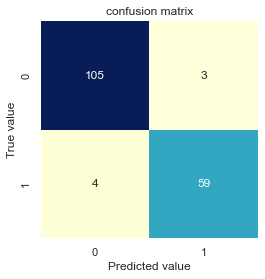

In [11]:
LR.fit(X_train[cols5], y_train)
cv_score_test = cross_val_score(LR, X_test[cols5], y_test, cv=10).mean()
print(cv_score_test)
plot_confusionmatrix(LR,X_test[cols5],y_test)

In [11]:
joblib.dump(LR, ".\\models\\LR.m") 

['.\\models\\LR.m']

## (b). **Dicision Tree**

In [12]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 12, criterion = 'entropy')
check_column_score(DT)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave.points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave.points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave.points_worst', 'symmetry_worst', 'fractal_dimension_worst']:
 Train score is:0.93 --- Test score is:0.947
['perimeter_worst', 'perimeter_mean', 'area_worst', 'area_mean', 'concave.points_mean', 'concave.points_worst']:
 Train score is:0.92 --- Test score is:0.959
['area_worst', 'area_mean', 'concave.points_mean', 'concave.points_worst']:
 Train score is:0.915 --- Test score is:0.947
['perimeter_worst', 'perimeter_mean', 'area_worst', 'area_mean', 'concave.points_mean', 'concave.points_worst', 'radius_worst', 

0.9238562091503268


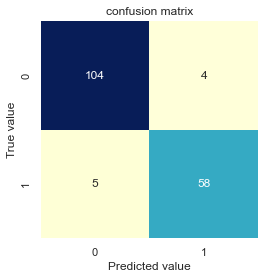

In [13]:
DT.fit(X_train[cols5], y_train)
cv_score_test = cross_val_score(DT, X_test[cols5], y_test, cv=10).mean()
print(cv_score_test)
plot_confusionmatrix(DT,X_test[cols5],y_test)

In [15]:
joblib.dump(DT, ".\\models\\DT.m") 

['.\\models\\DT.m']

## (c). **Neural Networks**

In [14]:
MLP = MLPClassifier(solver='adam', activation = 'relu', alpha=1e-5,max_iter=3000,
                     hidden_layer_sizes= (18,18,18),random_state=1)

check_column_score(MLP)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave.points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave.points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave.points_worst', 'symmetry_worst', 'fractal_dimension_worst']:
 Train score is:0.977 --- Test score is:0.982
['area_worst', 'area_mean', 'concave.points_mean', 'concave.points_worst']:
 Train score is:0.942 --- Test score is:0.971
['perimeter_worst', 'perimeter_mean', 'area_worst', 'area_mean', 'concave.points_mean', 'concave.points_worst', 'radius_worst', 'radius_mean', 'concavity_worst', 'concavity_mean']:
 Train score is:0.932 --- Test score is:0.965
['perimeter_worst', 'perimeter_mean', 'area_worst', 'area_

0.9591503267973855


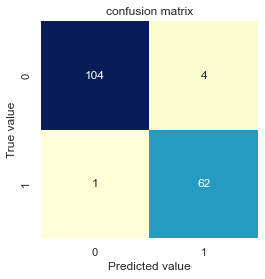

In [15]:
MLP.fit(X_train[cols5], y_train)
cv_score_test = cross_val_score(MLP, X_test[cols5], y_test, cv=10).mean()
print(cv_score_test)
plot_confusionmatrix(MLP,X_test[cols5],y_test)

In [19]:
joblib.dump(MLP, ".\\models\\MLP.m") 

['.\\models\\MLP.m']

## (d). **Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF = RandomForestClassifier(n_estimators=100)
check_column_score(RF)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave.points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave.points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave.points_worst', 'symmetry_worst', 'fractal_dimension_worst']:
 Train score is:0.955 --- Test score is:0.965
['perimeter_worst', 'perimeter_mean', 'area_worst', 'area_mean', 'concave.points_mean', 'concave.points_worst']:
 Train score is:0.94 --- Test score is:0.965
['perimeter_worst', 'perimeter_mean', 'area_worst', 'area_mean', 'concave.points_mean', 'concave.points_worst', 'radius_worst', 'radius_mean', 'concavity_worst', 'concavity_mean']:
 Train score is:0.937 --- Test score is:0.959
['area_worst', 'area_m

0.9470588235294117


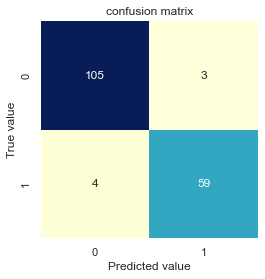

In [17]:
RF.fit(X_train[cols5], y_train)
cv_score_test = cross_val_score(RF, X_test[cols5], y_test, cv=10).mean()
print(cv_score_test)
plot_confusionmatrix(RF,X_test[cols5],y_test)

In [23]:
joblib.dump(RF, ".\\models\\RF.m") 

['.\\models\\RF.m']

## (e). **SVM**

In [18]:
SVM = SVC(kernel = 'rbf',C=1E6,gamma = 0.005)
check_column_score(SVM)  

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave.points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave.points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave.points_worst', 'symmetry_worst', 'fractal_dimension_worst']:
 Train score is:0.972 --- Test score is:0.947
['area_worst', 'area_mean', 'concave.points_mean', 'concave.points_worst']:
 Train score is:0.947 --- Test score is:0.971
['perimeter_worst', 'perimeter_mean', 'area_worst', 'area_mean', 'concave.points_mean', 'concave.points_worst', 'radius_worst', 'radius_mean', 'concavity_worst', 'concavity_mean']:
 Train score is:0.94 --- Test score is:0.93
['perimeter_worst', 'perimeter_mean', 'area_worst', 'area_me

0.9594771241830065


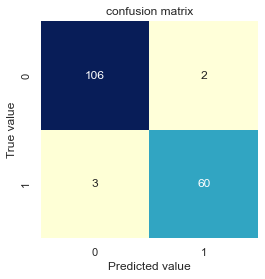

In [19]:
SVM.fit(X_train[cols5], y_train)
cv_score_test = cross_val_score(SVM, X_test[cols5], y_test, cv=10).mean()
print(cv_score_test)
plot_confusionmatrix(SVM,X_test[cols5],y_test)

In [27]:
joblib.dump(SVM, ".\\models\\SVM.m") 

['.\\models\\SVM.m']

## (f). **Tensorflow** 

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
TF = tf.keras.models.Sequential([
    layers.Dense(100, input_shape = (30,), activation='relu'),
    layers.Dense(100,activation="sigmoid"),
    layers.Dense(10,activation="softmax"),
    layers.Dense(2)
])

In [21]:
TF.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 14,232
Trainable params: 14,232
Non-trainable params: 0
_________________________________________________________________


In [22]:
# ready for training!
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
TF.compile(optimizer ="adam",
              loss = loss_fn,
              metrics = ["accuracy"])
# train them 100 times.
history = TF.fit(X_train[cols0], y_train, epochs = 100, verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 539us/step - loss: 0.6700 - accuracy: 0.7563
Epoch 2/100
13/13 [==============================] - 0s 462us/step - loss: 0.5776 - accuracy: 0.8920
Epoch 3/100
13/13 [==============================] - 0s 692us/step - loss: 0.4587 - accuracy: 0.9296
Epoch 4/100
13/13 [==============================] - 0s 616us/step - loss: 0.4028 - accuracy: 0.9497
Epoch 5/100
13/13 [==============================] - 0s 539us/step - loss: 0.3747 - accuracy: 0.9648
Epoch 6/100
13/13 [==============================] - 0s 769us/step - loss: 0.3567 - accuracy: 0.9724
Epoch 7/100
13/13 [==============================] - 0s 462us/step - loss: 0.3421 - accuracy: 0.9774
Epoch 8/100
13/13 [==============================] - 0s 539us/step - loss: 0.3303 - accuracy: 0.9799
Epoch 9/100
13/13 [==============================] - 0s 539us/step - loss: 0.3191 - accuracy: 0.9799
Epoch 10/100
13/13 [==============================] - 0s 538us/step - loss: 0.3092 - accura

13/13 [==============================] - 0s 539us/step - loss: 0.0862 - accuracy: 0.9975
Epoch 82/100
13/13 [==============================] - 0s 616us/step - loss: 0.0852 - accuracy: 0.9975
Epoch 83/100
13/13 [==============================] - 0s 616us/step - loss: 0.0842 - accuracy: 0.9975
Epoch 84/100
13/13 [==============================] - 0s 692us/step - loss: 0.0832 - accuracy: 0.9975
Epoch 85/100
13/13 [==============================] - 0s 539us/step - loss: 0.0822 - accuracy: 0.9975
Epoch 86/100
13/13 [==============================] - 0s 539us/step - loss: 0.0813 - accuracy: 0.9975
Epoch 87/100
13/13 [==============================] - 0s 769us/step - loss: 0.0803 - accuracy: 0.9975
Epoch 88/100
13/13 [==============================] - 0s 462us/step - loss: 0.0794 - accuracy: 0.9975
Epoch 89/100
13/13 [==============================] - 0s 539us/step - loss: 0.0785 - accuracy: 0.9975
Epoch 90/100
13/13 [==============================] - 0s 693us/step - loss: 0.0777 - accuracy: 

[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'training accuracy')]

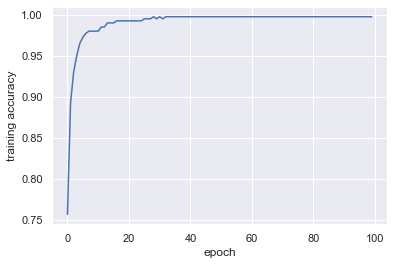

In [23]:
# plot the progress of the training over time:
plt.plot(history.history["accuracy"])
plt.gca().set(xlabel = "epoch", ylabel = "training accuracy")

In [24]:
TF.evaluate(X_test[cols0], y_test, verbose = 2)

6/6 - 0s - loss: 0.1201 - accuracy: 0.9708


[0.12011773139238358, 0.9707602262496948]

### cols5, only 4 features

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
TF1 = tf.keras.models.Sequential([
    layers.Dense(100, input_shape = (4,), activation='relu'),
    layers.Dense(100,activation="sigmoid"),
    layers.Dense(10,activation="softmax"),
    layers.Dense(2)    
])
# ready for training!
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
TF1.compile(optimizer ="adam",
              loss = loss_fn,
              metrics = ["accuracy"])
# train them 100 times.
history = TF1.fit(X_train[cols5], y_train, epochs = 100, verbose=1)


Epoch 1/100
13/13 [==============================] - 0s 539us/step - loss: 0.6549 - accuracy: 0.6256
Epoch 2/100
13/13 [==============================] - 0s 462us/step - loss: 0.5805 - accuracy: 0.6407
Epoch 3/100
13/13 [==============================] - 0s 462us/step - loss: 0.5076 - accuracy: 0.7613
Epoch 4/100
13/13 [==============================] - 0s 462us/step - loss: 0.4411 - accuracy: 0.8995
Epoch 5/100
13/13 [==============================] - 0s 539us/step - loss: 0.3950 - accuracy: 0.9296
Epoch 6/100
13/13 [==============================] - 0s 538us/step - loss: 0.3633 - accuracy: 0.9372
Epoch 7/100
13/13 [==============================] - 0s 462us/step - loss: 0.3458 - accuracy: 0.9372
Epoch 8/100
13/13 [==============================] - 0s 769us/step - loss: 0.3348 - accuracy: 0.9397
Epoch 9/100
13/13 [==============================] - 0s 462us/step - loss: 0.3264 - accuracy: 0.9397
Epoch 10/100
13/13 [==============================] - 0s 539us/step - loss: 0.3202 - accura

13/13 [==============================] - 0s 539us/step - loss: 0.1371 - accuracy: 0.9698
Epoch 82/100
13/13 [==============================] - 0s 616us/step - loss: 0.1376 - accuracy: 0.9698
Epoch 83/100
13/13 [==============================] - 0s 539us/step - loss: 0.1345 - accuracy: 0.9774
Epoch 84/100
13/13 [==============================] - 0s 616us/step - loss: 0.1398 - accuracy: 0.9724
Epoch 85/100
13/13 [==============================] - 0s 616us/step - loss: 0.1336 - accuracy: 0.9698
Epoch 86/100
13/13 [==============================] - 0s 539us/step - loss: 0.1333 - accuracy: 0.9724
Epoch 87/100
13/13 [==============================] - 0s 462us/step - loss: 0.1327 - accuracy: 0.9724
Epoch 88/100
13/13 [==============================] - 0s 615us/step - loss: 0.1311 - accuracy: 0.9724
Epoch 89/100
13/13 [==============================] - 0s 616us/step - loss: 0.1318 - accuracy: 0.9698
Epoch 90/100
13/13 [==============================] - 0s 462us/step - loss: 0.1309 - accuracy: 

[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'training accuracy')]

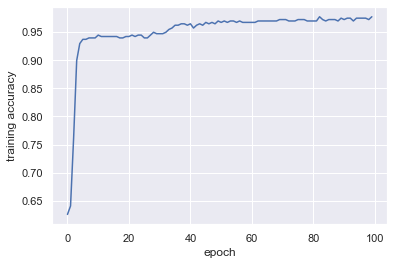

In [26]:
# plot the progress of the training over time:
plt.plot(history.history["accuracy"])
plt.gca().set(xlabel = "epoch", ylabel = "training accuracy")

In [27]:
TF1.evaluate(X_test[cols5], y_test, verbose = 2)

6/6 - 0s - loss: 0.1244 - accuracy: 0.9591


[0.12438490986824036, 0.9590643048286438]

In [ ]:
TF1.save('.\\models\\TF') 

Text(0.5, 0.98, 'The comparison of 6 Models')

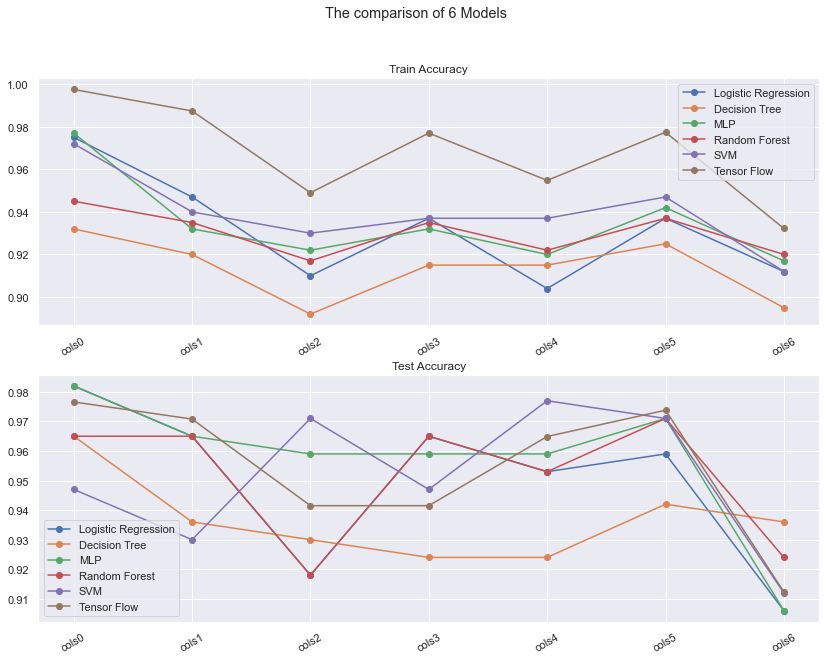

In [27]:
df1 = pd.read_csv(".\\files\\train_score.csv")
df2 = pd.read_csv(".\\files\\test_score.csv")
fig, axes = plt.subplots(2, 1,figsize=(14,10)) 
x = [0, 1, 2, 3,4,5,6]
labels = ["cols0","cols1","cols2","cols3","cols4","cols5","cols6"]
df1.plot(kind='line',marker='o',title='Train Accuracy',ax=axes[0])
df2.plot(kind='line',marker='o',title='Test Accuracy',ax=axes[1]) 
axes[0].set_xticks(x, labels, rotation=30)
axes[1].set_xticks(x, labels, rotation=30)
plt.suptitle("The comparison of 6 Models")